In [1]:
import numpy as np
import sklearn
from sklearn import tree

In [2]:
X = np.load('../CL_Toy_Example/Benchmark_1/tree_data_X.npy')
y = np.load('../CL_Toy_Example/Benchmark_1/tree_data_y.npy')

In [3]:
X

array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [4]:
y

array([1, 8, 0, ..., 2, 2, 2])

In [5]:
X.shape

(10000, 10)

In [6]:
y.shape

(10000,)

In [51]:
scores = []
for i in range(1, 11):
    clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=i)
    clf = clf.fit(X, y)
    scores.append(clf.score(X, y))

In [52]:
scores

[0.3507, 0.5612, 0.7625, 0.7814, 0.886, 0.9299, 0.9654, 0.9949, 0.9973, 1.0]

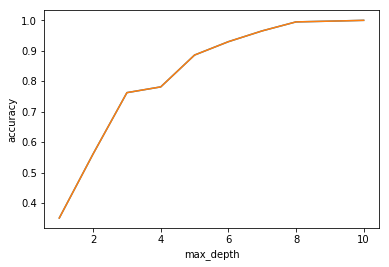

In [59]:

plt.plot(range(1, 11), scores)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.show()

In [60]:
    clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=3)
    clf = clf.fit(X, y)

In [61]:
import graphviz

In [62]:
dot_data = tree.export_graphviz(clf, out_file=None, filled=True, rounded=True)

In [63]:
graph = graphviz.Source(dot_data)

In [64]:
graph.render("benchmark1_gini_maxdepth3") 

'benchmark1_gini_maxdepth3.pdf'

In [13]:
from sklearn.manifold import TSNE

In [34]:
tsne = TSNE(n_components=2, verbose=1, metric='cityblock', learning_rate=50, )
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.082s...
[t-SNE] Computed neighbors for 10000 samples in 1.338s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.316986
[t-SNE] Error after 1000 iterations: -0.055119


In [35]:
tsne_results

array([[ -4.135784 ,  -1.2049043],
       [-11.049104 ,   5.642905 ],
       [-54.174957 ,   1.720834 ],
       ...,
       [ 43.589317 ,  27.706741 ],
       [-44.245502 , -10.296494 ],
       [-47.128387 ,   0.0565417]], dtype=float32)

In [36]:
tsne_results.shape

(10000, 2)

In [18]:
import matplotlib.pyplot as plt

In [37]:
colors = []
for i in y:
    if i == 0:
        colors.append('black')
    elif i == 1:
        colors.append('blue')
    elif i == 2:
        colors.append('green')
    elif i == 5:
        colors.append('red')
    elif i == 7:
        colors.append('yellow')
    elif i == 8:
        colors.append('cyan')

In [39]:
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=colors, s=1, alpha=0.35, marker='o')

In [41]:
plt.savefig('tsne.pdf')

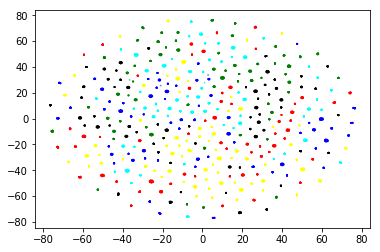

In [42]:
plt.show()